Running PCOS Biomarker Simulation

Simulating Normal Physiology:
Normal Physiological Simulation
Biomarker Ranges:
AMH: 1.5 - 4.0
Estradiol: 30 - 400
Testosterone: 15 - 70
SHBG: 20 - 80
LH: 1.0 - 20.0
FSH: 1.0 - 12.0
Insulin: 2.0 - 20.0

Diagnostic Analysis:

AMH Analysis:
  Mean: 2.75
  Standard Deviation: 0.56
  Min: 1.50
  Max: 3.88

Estradiol Analysis:
  Mean: 268.50
  Standard Deviation: 56.00
  Min: 117.44
  Max: 400.00

Testosterone Analysis:
  Mean: 42.54
  Standard Deviation: 10.50
  Min: 21.66
  Max: 60.58

SHBG Analysis:
  Mean: 50.15
  Standard Deviation: 12.57
  Min: 20.95
  Max: 80.00

LH Analysis:
  Mean: 10.63
  Standard Deviation: 3.71
  Min: 4.18
  Max: 17.97

FSH Analysis:
  Mean: 6.47
  Standard Deviation: 2.02
  Min: 2.55
  Max: 11.20

Insulin Analysis:
  Mean: 10.96
  Standard Deviation: 1.58
  Min: 7.23
  Max: 15.38

PCOS Diagnostic Indicators:
  No clear PCOS indicators detected


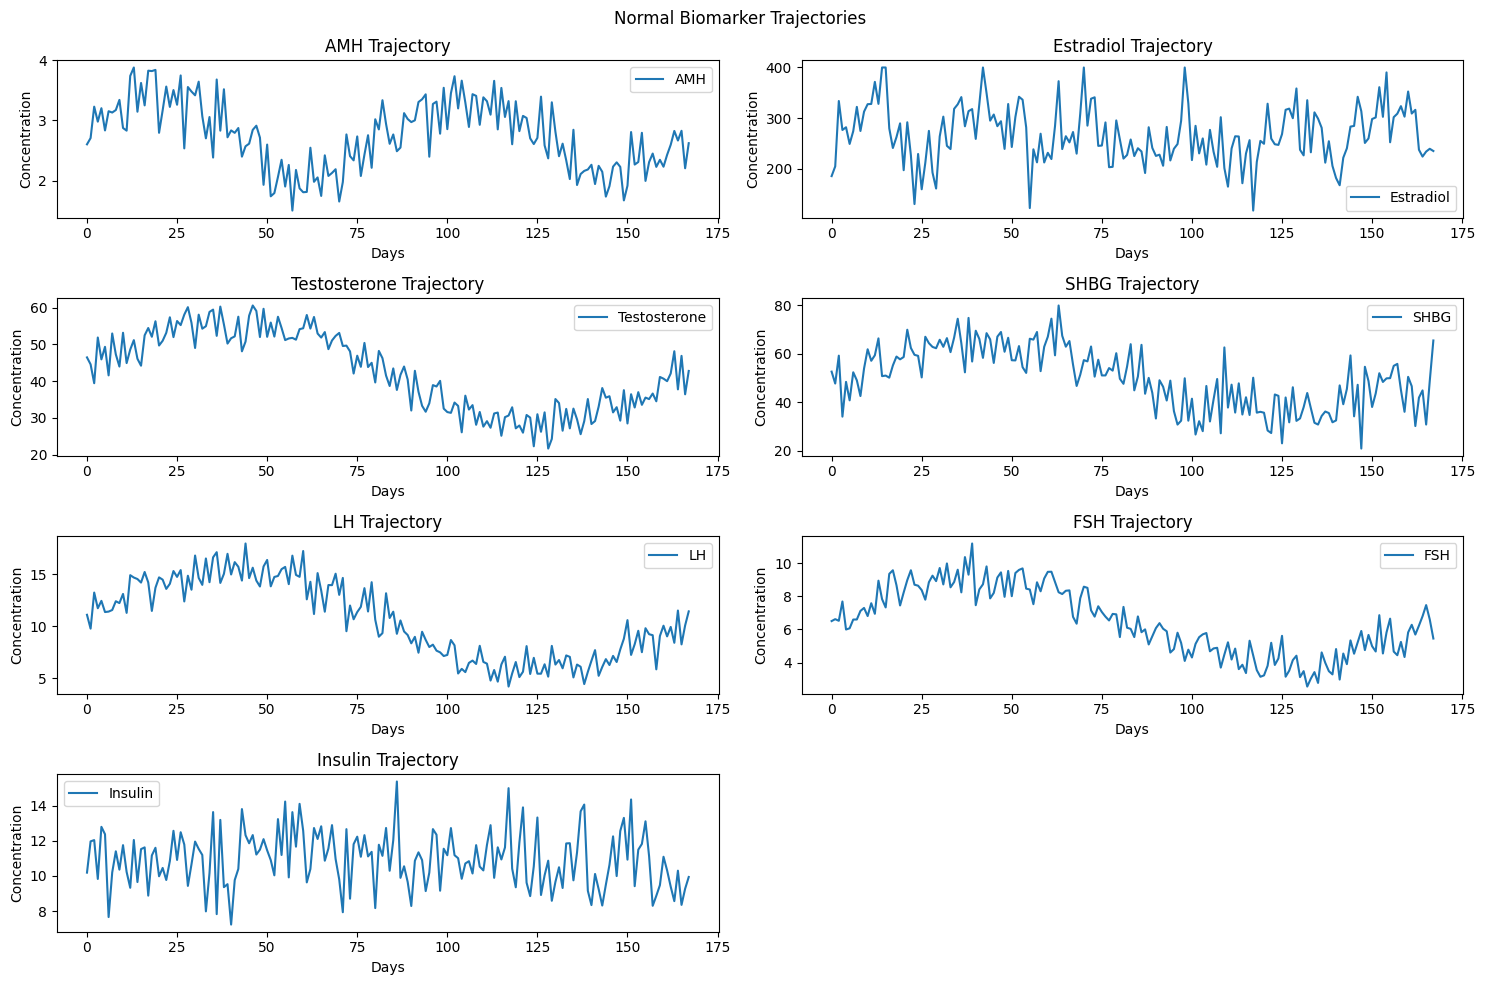



Simulating PCOS Physiology:
PCOS Physiological Simulation
Biomarker Ranges:
AMH: 5.0 - 14.0
Estradiol: 20 - 600
Testosterone: 70 - 150
SHBG: 10 - 40
LH: 10.0 - 30.0
FSH: 1.0 - 8.0
Insulin: 10.0 - 30.0

Diagnostic Analysis:

AMH Analysis:
  Mean: 11.76
  Standard Deviation: 0.58
  Min: 10.47
  Max: 13.21

Estradiol Analysis:
  Mean: 389.23
  Standard Deviation: 87.67
  Min: 177.31
  Max: 600.00

Testosterone Analysis:
  Mean: 129.40
  Standard Deviation: 6.70
  Min: 113.09
  Max: 146.72

SHBG Analysis:
  Mean: 21.73
  Standard Deviation: 2.04
  Min: 15.40
  Max: 27.32

LH Analysis:
  Mean: 19.96
  Standard Deviation: 3.83
  Min: 12.95
  Max: 27.04

FSH Analysis:
  Mean: 4.39
  Standard Deviation: 1.28
  Min: 1.44
  Max: 6.98

Insulin Analysis:
  Mean: 22.57
  Standard Deviation: 1.72
  Min: 16.62
  Max: 25.86

PCOS Diagnostic Indicators:
Potential PCOS Indicators:
  - Elevated AMH
  - High Testosterone
  - Low SHBG


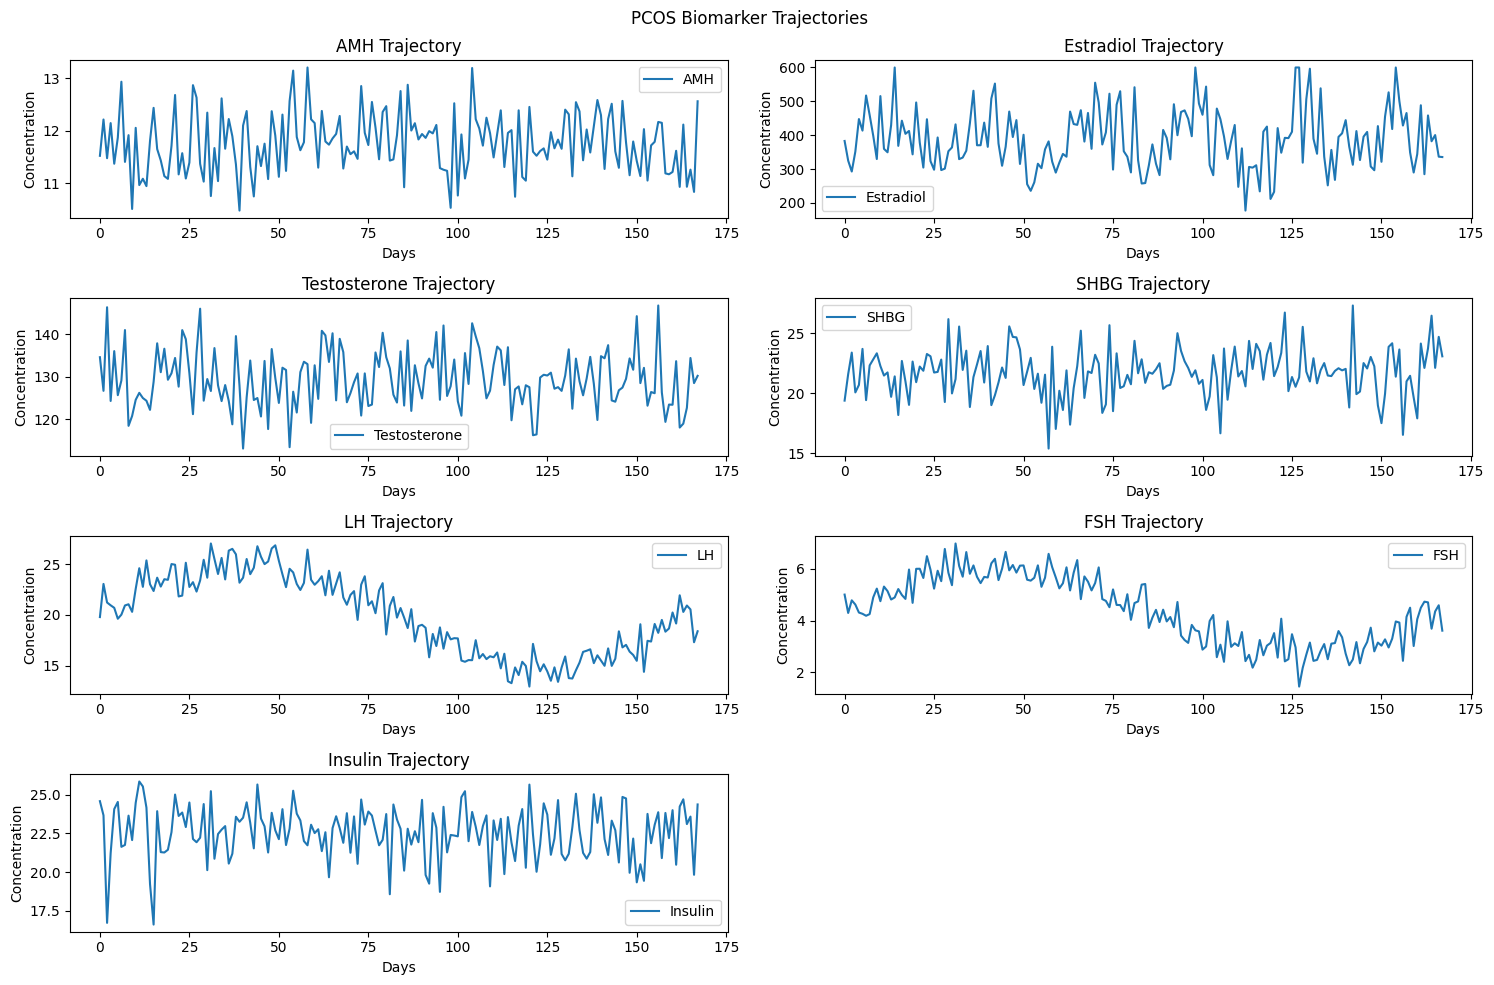

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class PCOSBiomarkerSimulation:
    def __init__(self, is_pcos: bool = False, bmi: float = 22, stress_level: float = 0.5):
        """
        Initialize biomarker simulation with PCOS or non-PCOS parameters

        Parameters:
        -----------
        is_pcos : bool, optional
            Determines whether to simulate PCOS or normal physiology (default is False)
        bmi : float, optional
            Body Mass Index of the individual (default is 22)
        stress_level : float, optional
            Stress level on a scale of 0 to 1 (default is 0.5)
        """
        # Biomarker reference ranges and simulation parameters
        self.biomarker_ranges = {
            'normal': {
                'AMH': (1.5, 4.0),  # ng/mL
                'Estradiol': (30, 400),  # pg/mL, varies with menstrual cycle
                'Testosterone': (15, 70),  # ng/dL
                'SHBG': (20, 80),  # nmol/L
                'LH': (1.0, 20.0),  # mIU/mL
                'FSH': (1.0, 12.0),  # mIU/mL
                'Insulin': (2.0, 20.0)  # uIU/mL
            },
            'pcos': {
                'AMH': (5.0, 14.0),  # ng/mL
                'Estradiol': (20, 600),  # pg/mL, wider range
                'Testosterone': (70, 150),  # ng/dL, elevated
                'SHBG': (10, 40),  # nmol/L, lower range
                'LH': (10.0, 30.0),  # mIU/mL, elevated
                'FSH': (1.0, 8.0),  # mIU/mL, lower range
                'Insulin': (10.0, 30.0)  # uIU/mL, elevated
            }
        }

        self.is_pcos = is_pcos
        self.bmi = bmi
        self.stress_level = stress_level
        self.current_ranges = (
            self.biomarker_ranges['pcos'] if is_pcos
            else self.biomarker_ranges['normal']
        )

        # Print initialization details
        print(f"{'PCOS' if is_pcos else 'Normal'} Physiological Simulation")
        print("Biomarker Ranges:")
        for biomarker, (min_val, max_val) in self.current_ranges.items():
            print(f"{biomarker}: {min_val} - {max_val}")

    def generate_biomarker_trajectory(
        self,
        num_cycles: int = 6,
        cycle_length: int = 28
    ) -> pd.DataFrame:
        """
        Generate biomarker trajectories simulating hormonal changes

        Parameters:
        -----------
        num_cycles : int, optional
            Number of menstrual cycles to simulate (default 6)
        cycle_length : int, optional
            Length of menstrual cycle in days (default 28)

        Returns:
        --------
        pd.DataFrame
            Dataframe with simulated biomarker values over time
        """
        # Total simulation days
        total_days = num_cycles * cycle_length

        # Initialize arrays for biomarkers
        days = np.arange(total_days)

        # Biomarker generation with cyclical and condition-specific variations
        amh = self._generate_amh_trajectory(total_days)
        estradiol = self._generate_estradiol_trajectory(total_days, cycle_length)
        testosterone = self._generate_testosterone_trajectory(total_days)
        shbg = self._generate_shbg_trajectory(total_days, testosterone)
        lh = self._generate_lh_trajectory(total_days, estradiol)
        fsh = self._generate_fsh_trajectory(total_days, lh)
        insulin = self._generate_insulin_trajectory(total_days)

        # Create DataFrame
        df = pd.DataFrame({
            'Day': days,
            'Cycle': days // cycle_length + 1,
            'AMH': amh,
            'Estradiol': estradiol,
            'Testosterone': testosterone,
            'SHBG': shbg,
            'LH': lh,
            'FSH': fsh,
            'Insulin': insulin
        })

        return df

    def _generate_amh_trajectory(self, total_days: int) -> np.ndarray:
        """Generate AMH trajectory with PCOS-specific characteristics"""
        base_range = self.current_ranges['AMH']
        mean = np.mean(base_range)
        std = (base_range[1] - base_range[0]) / 4

        # PCOS: less variation, higher baseline
        if self.is_pcos:
            amh = np.full(total_days, mean + std)
            # Add minimal noise
            amh += np.random.normal(0, std/4, total_days)
        else:
            # Normal: more natural fluctuations
            amh = mean + std * np.sin(np.linspace(0, 4*np.pi, total_days))
            amh += np.random.normal(0, std/2, total_days)

        return np.clip(amh, base_range[0], base_range[1])

    def _generate_estradiol_trajectory(self, total_days: int, cycle_length: int) -> np.ndarray:
        """Generate Estradiol trajectory with nuanced cycle phases"""
        base_range = self.current_ranges['Estradiol']
        mean = np.mean(base_range)
        std = (base_range[1] - base_range[0]) / 4

        # Simulate menstrual cycle phases
        days = np.arange(total_days) % cycle_length
        follicular = (days < cycle_length // 2)
        ovulatory = (days == cycle_length // 2)
        luteal = (days > cycle_length // 2)

        estradiol = np.zeros(total_days)
        estradiol[follicular] = mean + std * (days[follicular] / (cycle_length // 2))
        estradiol[ovulatory] = mean + 2 * std
        estradiol[luteal] = mean + std * ((cycle_length - days[luteal]) / (cycle_length // 2))

        estradiol += np.random.normal(0, std/2, total_days)

        return np.clip(estradiol, base_range[0], base_range[1])

    def _generate_testosterone_trajectory(self, total_days: int) -> np.ndarray:
        """Generate Testosterone trajectory with PCOS considerations"""
        base_range = self.current_ranges['Testosterone']
        mean = np.mean(base_range)
        std = (base_range[1] - base_range[0]) / 4

        # PCOS: higher baseline testosterone
        if self.is_pcos:
            testosterone = np.full(total_days, mean + std)
            testosterone += np.random.normal(0, std/3, total_days)
        else:
            # Normal: more stable trajectory
            testosterone = mean + std * np.sin(np.linspace(0, 2*np.pi, total_days))
            testosterone += np.random.normal(0, std/4, total_days)

        return np.clip(testosterone, base_range[0], base_range[1])

    def _generate_shbg_trajectory(self, total_days: int, testosterone: np.ndarray) -> np.ndarray:
        """Generate SHBG trajectory influenced by testosterone levels"""
        base_range = self.current_ranges['SHBG']
        mean = np.mean(base_range)
        std = (base_range[1] - base_range[0]) / 4

        # PCOS: lower SHBG and testosterone influence
        if self.is_pcos:
            shbg = mean - 0.5 * (testosterone / max(testosterone)) * std
            shbg += np.random.normal(0, std/4, total_days)
        else:
            # Normal: more variation
            shbg = mean + std * np.sin(np.linspace(0, 2*np.pi, total_days))
            shbg += np.random.normal(0, std/2, total_days)

        return np.clip(shbg, base_range[0], base_range[1])

    def _generate_lh_trajectory(self, total_days: int, estradiol: np.ndarray) -> np.ndarray:
        """Generate LH trajectory with feedback from estradiol"""
        base_range = self.current_ranges['LH']
        mean = np.mean(base_range)
        std = (base_range[1] - base_range[0]) / 4

        lh = mean + std * np.sin(np.linspace(0, 2*np.pi, total_days))
        lh += 0.1 * estradiol / max(estradiol)  # Feedback influence
        lh += np.random.normal(0, std/4, total_days)

        return np.clip(lh, base_range[0], base_range[1])

    def _generate_fsh_trajectory(self, total_days: int, lh: np.ndarray) -> np.ndarray:
        """Generate FSH trajectory with feedback from LH"""
        base_range = self.current_ranges['FSH']
        mean = np.mean(base_range)
        std = (base_range[1] - base_range[0]) / 4

        fsh = mean + std * np.sin(np.linspace(0, 2*np.pi, total_days))
        fsh -= 0.1 * lh / max(lh)  # Feedback suppression from LH
        fsh += np.random.normal(0, std/4, total_days)

        return np.clip(fsh, base_range[0], base_range[1])

    def _generate_insulin_trajectory(self, total_days: int) -> np.ndarray:
        """Generate Insulin trajectory influenced by BMI and stress"""
        base_range = self.current_ranges['Insulin']
        mean = np.mean(base_range)
        std = (base_range[1] - base_range[0]) / 4

        insulin = mean + 0.2 * (self.bmi - 22) + 0.3 * self.stress_level * std
        insulin += np.random.normal(0, std/3, total_days)

        return np.clip(insulin, base_range[0], base_range[1])

    def visualize_biomarkers(self, df: pd.DataFrame):
        """
        Create visualization of biomarker trajectories

        Parameters:
        -----------
        df : pd.DataFrame
            Dataframe with biomarker data
        """
        plt.figure(figsize=(15, 10))

        # Subplot for each biomarker
        biomarkers = ['AMH', 'Estradiol', 'Testosterone', 'SHBG', 'LH', 'FSH', 'Insulin']
        for i, biomarker in enumerate(biomarkers, 1):
            plt.subplot(4, 2, i)
            plt.plot(df['Day'], df[biomarker], label=biomarker)
            plt.title(f'{biomarker} Trajectory')
            plt.xlabel('Days')
            plt.ylabel('Concentration')
            plt.legend()

        plt.suptitle(f"{'PCOS' if self.is_pcos else 'Normal'} Biomarker Trajectories")
        plt.tight_layout()
        plt.show()

    def diagnostic_analysis(self, df: pd.DataFrame):
        """
        Perform diagnostic analysis of biomarker data

        Parameters:
        -----------
        df : pd.DataFrame
            Dataframe with biomarker data
        """
        # Print detailed diagnostic information
        print("\nDiagnostic Analysis:")
        for biomarker in ['AMH', 'Estradiol', 'Testosterone', 'SHBG', 'LH', 'FSH', 'Insulin']:
            print(f"\n{biomarker} Analysis:")
            print(f"  Mean: {df[biomarker].mean():.2f}")
            print(f"  Standard Deviation: {df[biomarker].std():.2f}")
            print(f"  Min: {df[biomarker].min():.2f}")
            print(f"  Max: {df[biomarker].max():.2f}")

        # Diagnostic criteria interpretation
        print("\nPCOS Diagnostic Indicators:")
        amh_mean = df['AMH'].mean()
        testosterone_mean = df['Testosterone'].mean()
        shbg_mean = df['SHBG'].mean()

        # Simple diagnostic criteria based on biomarker levels
        criteria_met = []
        if amh_mean > 4.0:
            criteria_met.append("Elevated AMH")
        if testosterone_mean > 70:
            criteria_met.append("High Testosterone")
        if shbg_mean < 40:
            criteria_met.append("Low SHBG")

        if criteria_met:
            print("Potential PCOS Indicators:")
            for criterion in criteria_met:
                print(f"  - {criterion}")
        else:
            print("  No clear PCOS indicators detected")

def run_pcos_simulation():
    # Simulate both normal and PCOS scenarios
    print("Running PCOS Biomarker Simulation\n")

    # Normal Physiology Simulation
    print("Simulating Normal Physiology:")
    normal_sim = PCOSBiomarkerSimulation(is_pcos=False, bmi=22, stress_level=0.3)
    normal_df = normal_sim.generate_biomarker_trajectory()
    normal_sim.diagnostic_analysis(normal_df)
    normal_sim.visualize_biomarkers(normal_df)

    print("\n" + "="*50 + "\n")

    # PCOS Physiology Simulation
    print("Simulating PCOS Physiology:")
    pcos_sim = PCOSBiomarkerSimulation(is_pcos=True, bmi=28, stress_level=0.8)
    pcos_df = pcos_sim.generate_biomarker_trajectory()
    pcos_sim.diagnostic_analysis(pcos_df)
    pcos_sim.visualize_biomarkers(pcos_df)

# Run the simulation
if __name__ == "__main__":
    run_pcos_simulation()